<a href="https://colab.research.google.com/github/nageshwar8296-bit/Netflix_EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Analysis

This notebook performs an exploratory data analysis on the Netflix dataset to understand trends in content, user behavior, and content characteristics on the platform.

## Data Loading

Loading the dataset from the provided file path into a pandas DataFrame.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/netflix.csv')

# Display the first few rows
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Handle missing values

Inspecting the dataset for missing values and deciding on a strategy to handle them (e.g., imputation, removal).

**Reasoning**:
Calculate and display the number of missing values for each column to understand the extent of missing data and inform the strategy for handling them.



In [5]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## Clean the data

Performing any necessary data cleaning steps, such as correcting data types, removing duplicates, or standardizing formats.

**Reasoning**:
Fill the missing values in the specified columns and convert the 'date_added' column to datetime objects.



In [7]:
# Fill missing values in categorical columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Fill missing values in 'date_added', 'rating', and 'duration' with the mode
for col in ['date_added', 'rating', 'duration']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert 'date_added' to datetime and drop duplicates
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df.drop_duplicates(inplace=True)

# Display the head and info of the dataframe
display(df.head())
display(df.info())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


None

In [ ]:
# Re-calculate missing values after cleaning
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64


## Exploratory Data Analysis (EDA)

Analyzing the dataset to discover patterns, trends, and insights.

### Analyze content type distribution

### Explore content added over time

### Investigate release year distribution

### Examine top directors and actors

### Analyze content ratings

### Explore genre distribution

### Analyze content type distribution

Analyzing the distribution of content types (movies and TV shows).

In [8]:
# Calculate and print the distribution of content types
content_type_distribution = df['type'].value_counts()
print("Distribution of content types:")
print(content_type_distribution)

Distribution of content types:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Visualizing the distribution of content types (movies vs. TV shows) using a bar plot to compare their counts.

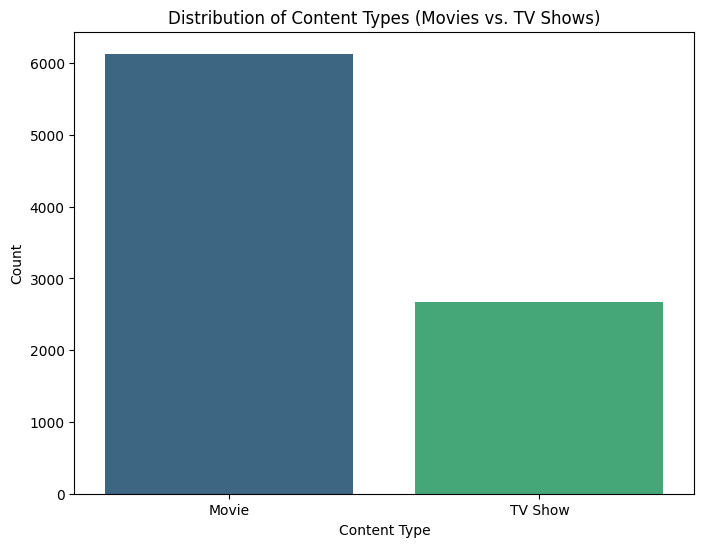

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=df, hue='type', palette='viridis', legend=False)
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')


plt.show()

### Explore content added over time

Analyzing how the number of movies and TV shows added to Netflix changed over time (monthly).

In [10]:
# Extract month and year from 'date_added' and count yearly content
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
yearly_content_counts = df['year_added'].value_counts().sort_index()
print("Yearly content added to Netflix:")
print(yearly_content_counts)

Yearly content added to Netflix:
year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1889
2021    1498
Name: count, dtype: int64




Visualizing the trend of content added to Netflix over time using a line plot to show the increase in content over the years.

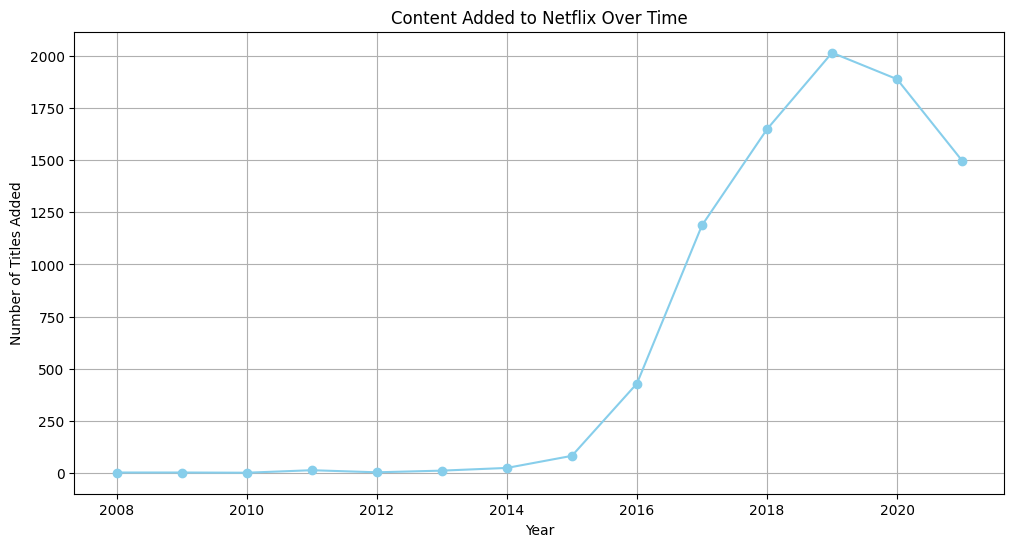

In [11]:
# Create a line plot for content added over time
plt.figure(figsize=(12, 6))
yearly_content_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

### Investigate release year distribution

Analyzing the distribution of content based on their release year.

In [12]:
# Calculate and print the distribution of release years
release_year_distribution = df['release_year'].value_counts().sort_index()
print("Distribution of release years:")
print(release_year_distribution)

Distribution of release years:
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64




Visualizing the distribution of content by release year using a histogram.

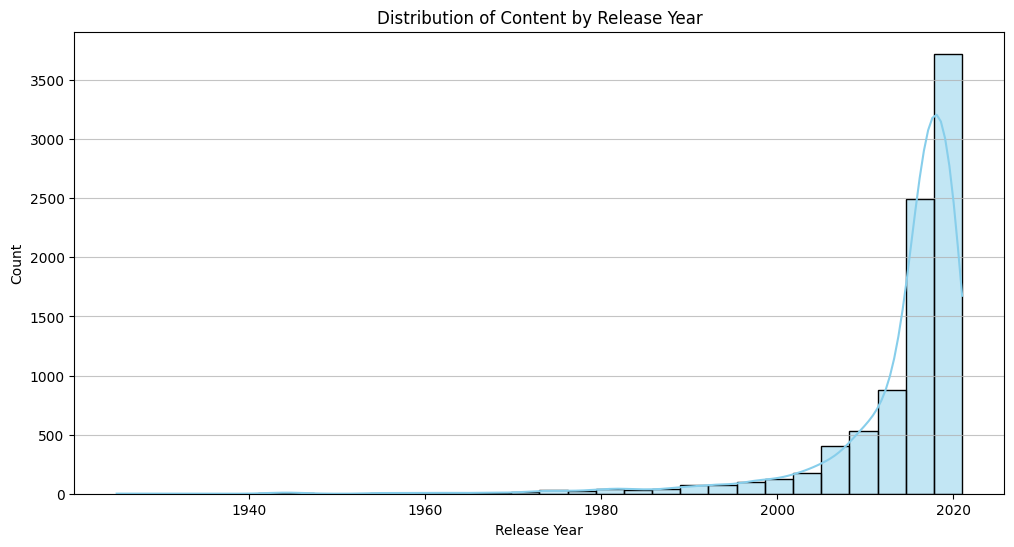

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Examine Top Directors and Actors

Identifying the top directors and actors based on their frequency in the dataset.

In [14]:
# Calculate and print top 10 directors
top_directors = df['director'].value_counts().head(10)
print("Top 10 Directors:")
print(top_directors)

# Handle multiple actors in 'cast' column and print top 10 actors
actors = df['cast'].str.split(', ', expand=True).stack()
top_actors = actors.value_counts().head(10)
print("\nTop 10 Actors:")
print(top_actors)

Top 10 Directors:
director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64

Top 10 Actors:
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64


### Analyze content ratings

Analyzing the distribution of content ratings to understand the different age and content suitability categories.

In [ ]:
# Calculate and print the distribution of content ratings
rating_distribution = df['rating'].value_counts()
print("Distribution of content ratings:")
print(rating_distribution)

Distribution of content ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


### Explore genre distribution

Analyzing the distribution of genres (listed_in) to understand the types of content available.

In [ ]:
# Split genres and calculate their distribution
genres = df['listed_in'].str.split(', ', expand=True).stack()
genre_distribution = genres.value_counts()
print("Distribution of genres:")
print(genre_distribution)

Distribution of genres:
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Show

### Visualize Top Genres

Visualizing the distribution of top genres using a bar plot to highlight the most frequent genres on Netflix.

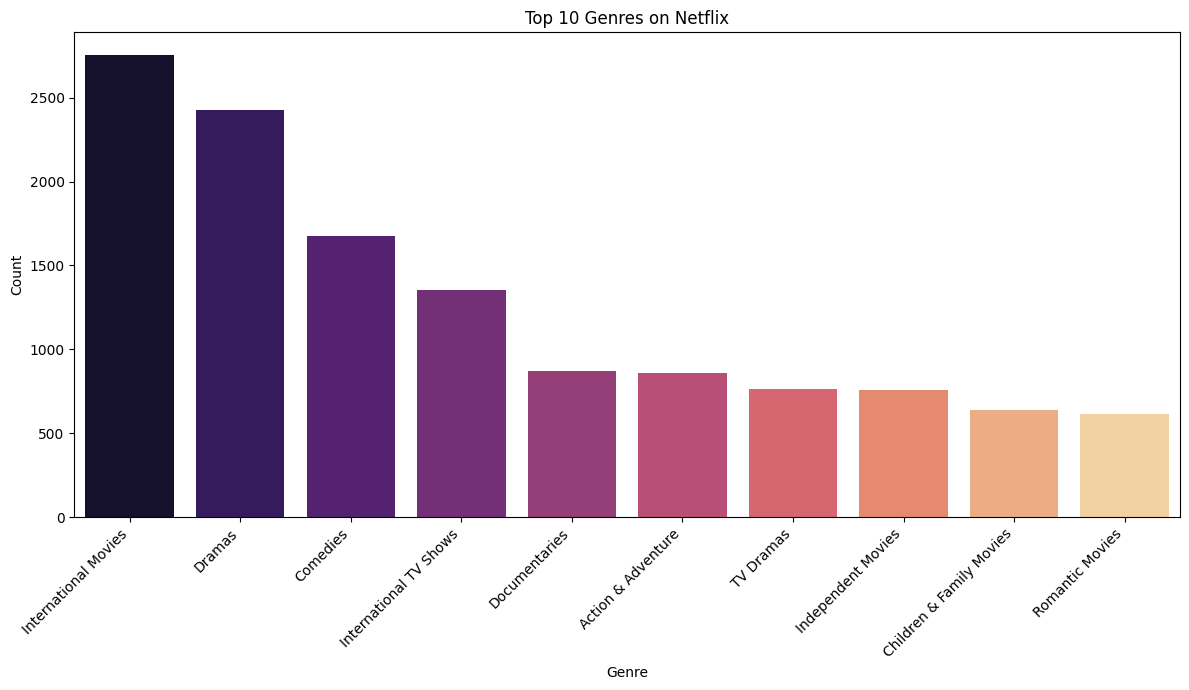

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_distribution.head(10).index, y=genre_distribution.head(10).values, hue=genre_distribution.head(10).index, palette='magma', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary of Findings

Based on the exploratory data analysis performed on the Netflix dataset, the following key insights were observed:

*   **Content Type Distribution:** There is a significantly higher number of Movies compared to TV Shows on Netflix.
*   **Content Added Over Time:** The number of titles added to Netflix has shown a general increasing trend over the years, with a notable surge in content added from 2016 onwards. However, there is a noticeable decline in the number of titles added in 2020 and 2021, likely attributable to the global COVID-19 pandemic and its impact on production and release schedules.
*   **Release Year Distribution:** The distribution of content by release year indicates a concentration of titles released in recent years, reflecting Netflix's focus on newer content.
*   **Top Directors and Actors:** The analysis identified the most frequent directors and actors, providing insights into the key creative individuals contributing to Netflix's content library. (Note: 'Unknown' appears frequently in directors and actors due to missing data).
*   **Content Ratings:** The distribution of content ratings shows a variety of categories, catering to different age groups and content suitability preferences.
*   **Genre Distribution:** The analysis of genres revealed the most popular content categories, with "International Movies" and "Dramas" being among the most prevalent.

This EDA provides a foundational understanding of the Netflix content landscape, highlighting trends in content type, growth over time, popular release years, key contributors, ratings, and genres. Further analysis could delve deeper into specific aspects, such as the relationship between content characteristics and user engagement.